In [102]:
import sys
sys.path.insert(0, '/home/ubuntu/miniconda3/lib/python3.5/site-packages')

%matplotlib inline
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

w = open('./AviationData.txt')
# list of lists
aviation_list = []
for st in w:
    aviation_list.append(st.split(" | "))
    
# list of strings    
lax_codes = []
for i,event in enumerate(aviation_list):
    if i>0:
        lax_codes.append(event[0])

# list of hashes
aviation_list_of_dict=[]
aviation_dict = {}
attributes=aviation_list[0]

for i,event in enumerate(aviation_list[1:]):
    for attr_i,attr in enumerate(attributes):
        if(attr_i>len(event)-1):
            aviation_dict[attr]=''
        else:
            aviation_dict[attr]=event[attr_i]
    aviation_list_of_dict.append(aviation_dict)
    aviation_dict={}
incidents_df =  pd.DataFrame(aviation_list_of_dict)


In [103]:
## order the states by number of aviation accidents
incidents_df['state'] = incidents_df['Location'].apply(lambda x: x.split(', ')[1] if len(x.split(', '))>1 else x)
counts_by_area = incidents_df['state'].value_counts()


## California Texas and Florida have the top three most incidents for problems to occur in an airport

/home/ubuntu/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


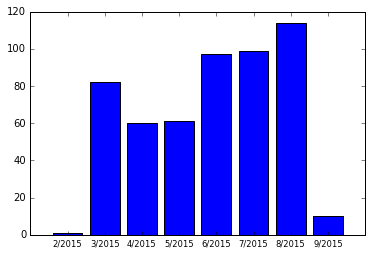

In [104]:
## plot the total number of seriius injures and fatalities for a given month


incidents_df['Event Date'] = pd.to_datetime(incidents_df['Event Date'])
incidents_df = incidents_df.sort('Event Date')
incidents_df['Month/Year'] = incidents_df['Event Date'].apply(lambda x: "%d/%d" % (x.month, x.year))
incidents_df[['Total Serious Injuries','Total Fatal Injuries']] = incidents_df[['Total Serious Injuries','Total Fatal Injuries']].replace(to_replace='', value='0').astype(int)
incidents_df['fatalities/injuries total'] = incidents_df['Total Fatal Injuries']+incidents_df['Total Serious Injuries']

physical_harm = incidents_df.groupby(['Month/Year'])['fatalities/injuries total'].sum()



plt.bar(range(len(physical_harm)), physical_harm.values, align='center')
plt.xticks(range(len(physical_harm)), physical_harm.index.values, size='small')
plt.show()

# this plot shows the summer months of the most fatal and dangerous incidents with a peak in number 
# of people hurt or killed in August

In [5]:
arr = [1,0,0,3,20,5,80,3,7,0,5,6,8]

def sort(ar,c):
    for i,a in enumerate(ar):
        next = ar[i+1]
        
        if(next< a):
            ar[i+1] = a
            ar[i] = next
        if(len(ar)-2 == i):
            break
    c=c+1
    if c == len(ar)-1:
        return ar
    return sort(ar,c)
print(sort(arr,1))

[0, 0, 0, 1, 3, 3, 5, 5, 6, 7, 8, 20, 80]
